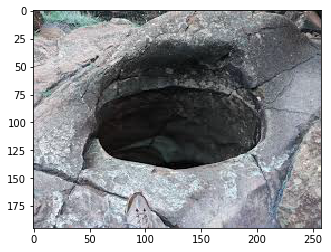

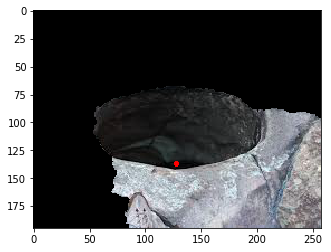

73.23933369440222
196.06121493043952


-1

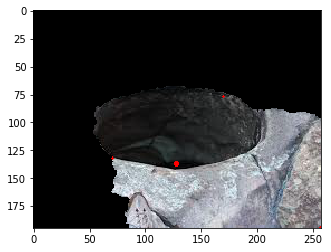

In [31]:
import numpy as np
import imutils
import cv2
from matplotlib import pyplot as plt
import math

img = cv2.imread('test images/p77.jfif')#pot07,img22.jfif,p77,pot01.jfif,pot02.jpg,pot06.jfif
img33=img



plt.imshow(img33),
plt.show()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# rect = (50,50,450,290)
rect = (50,50,220,150)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

# plt.imshow(img),
# plt.show()
# orig = image.copy()

background = img33-img
background[np.where((background > [0,0,0]).all(axis = 2))] =[255,255,255]
final = background + img
# cv2.imshow("image", final )
# display the results of our newly improved method
gray = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11, 11), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
# image = orig.copy()
cv2.circle(img, minLoc, 1, (255, 0, 0), 2)
# cv2.imshow("Robust", img)
plt.imshow(img),
plt.show()


image3=img
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
 
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
 
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
# cv2.drawContours(image3, [c], -1, (0, 255, 255), 2)
cv2.circle(image3, extLeft, 1, (255, 0, 0), -1)
cv2.circle(image3, extRight, 1, (255, 0, 0), -1)
cv2.circle(image3, extTop, 1, (255, 0, 0), -1)
# cv2.circle(image3, extBot, 8, (255, 255, 0), -1)
 
# show the output image
# cv2.imshow("input", img33)
# cv2.imshow("Image", image3)
# cv2.waitKey(0)
# plt.imshow(img33)
plt.imshow(image3)


distance = math.sqrt( ((extTop[0]-minLoc[0])**2)+((extTop[1]-minLoc[1])**2) )
width = math.sqrt( ((extLeft[0]-extRight[0])**2)+((extLeft[1]-extRight[1])**2) )



print(distance)
print(width)

cv2.waitKey(0)